# **YOLOV8 Face Mask Detetcion**



This notebook explains training custom YOLOv8 model for object detection. I am using "Face Mask Dataset" from kaggle which is already available in yolo format. 
https://www.kaggle.com/datasets/maalialharbi/face-mask-dataset?resource=download


This is a initial version of custom trianing with YOLOv8.
Currently YOLOv8 is the newest state-of-the-art YOLO model that can be used for object detection, image classification, and instance segmentation tasks.


  I am using Google Colab for trianing. If you are intrested to check custom trianing with YOLOv5, please follow this link 😀 https://github.com/Balakishan77/yolov5_custom_trained_traffic_sign_detector.


### **1. Check GPU requirements**

Google Colab is an online environment similar to Jupiter notebook where you can train deep learning models on GPU/*TPU*. The free plan of Google Colab allows you to train the deep learning model for up to 12 hrs before the runtime disconnects. By visiting the runtime section change run type to GPU.

In [1]:
# to check and monitoring of NVIDIA GPU devices. 
!nvidia-smi 

Fri Apr  7 12:00:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.94       Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:3B:00.0 Off |                  N/A |
|  0%   28C    P8    18W / 370W |      0MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ... WDDM  | 00000000:5E:00.0 Off |                  N/A |
|  0%   

### **2. YOLOV8 Installation:**
We used to clone the repo or use torchhub to work with Yolov5. The recent YoloV8 has been released as pip package, so we don't need to clone any repo. This package alone installs ever dependency for yolov8.

The Pip install of the ultralytics package including all requirements.txt in a Python>=3.7.0 environment, including PyTorch>=1.7.


In [3]:
# installing package to work with yolov8
!pip install ultralytics


     ---------------------------------------- 38.2/38.2 MB 7.5 MB/s eta 0:00:00


### **YOLOV8 format: Anslysis of dataset**

The format for Yolov8 is same as Yolov5. The YOLO format, with one .txt file per image (if no objects in image, no .txt file is required). The *.txt file specifications are:

One row per object Each row is class x_center y_center width height format.

Box coordinates must be in normalized xywh format (from 0 - 1). If your boxes are in pixels, divide x_center and width by image width, and y_center and height by image height. Class numbers are zero-indexed (start from 0).

In [2]:
# Checking the size of images and displaying them
import numpy as np
import cv2
# Image shape in Training
image = cv2.imread('C:/Users/user/Downloads/iris_pupil_data/train/images/1_jpg.rf.3c60836d781bb8f4a30574e828e17a75.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the training image {}, {}".format(height, width))
# Image shape in validation
image = cv2.imread('C:/Users/user/Downloads/iris_pupil_data/valid/images/13_jpg.rf.83971b366ed2c965936891ee372d02f8.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the validation image {}, {}".format(height, width))

shape of the training image 226, 300
shape of the validation image 240, 320


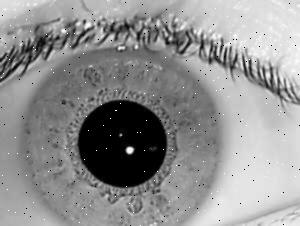

In [3]:
# dispying with different width
from IPython.display import Image 
Image(filename='C:/Users/user/Downloads/iris_pupil_data/train/images/1_jpg.rf.3c60836d781bb8f4a30574e828e17a75.jpg', width=300) 

### **4. Create iris_pupil_data.yaml (dataset config file)**


In [ ]:

# I will write the contents of the cell to a file
%%writefile C:/Users/user/Downloads/iris_pupil_data/ 

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: C:/Users/user/Downloads/iris_pupil_data/ # dataset root dir
train: train/images/ # train images (relative to 'path')
val: valid/images/ # val images (relative to 'path')
test:  # test images (optional)

# number of classes including background
nc: 3

# class names
#names: ['0', '1', '2']
names: [ 'iris', 'pupil']  # class names


Overwriting /content/drive/MyDrive/datasets/mask_dataset/face_mask_detection.yaml


### **5. Training Our Custom Face Mask Detetcion Model:**

I am using a YOLOv8m pretrained model for custom training with my dataset.

Parameters:
*   specify the path to the data configuration file
*   specify a path to weights to start transfer learning from. yolov8m.pt (starting from Pretrained weights)
*   input image size
*   Size of a batch (model weights are updated with each batch).
*   No of epochs.

It will cache images for faster training, cache images in "ram" (default) or "disk

In [5]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="E:/ONEDRIVE/OneDrive - oasis.inje.ac.kr/MY_projects/Yolov8-Custom-Object-Detetction/iris_pupil_data.yaml", epochs=50, imgsz=640)  # train the model

New https://pypi.org/project/ultralytics/8.0.68 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.53  Python-3.10.9 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
yolo\engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=E:/ONEDRIVE/OneDrive - oasis.inje.ac.kr/MY_projects/Yolov8-Custom-Object-Detetction/iris_pupil_data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thicknes

while training , I have observed some error. I think it is related to some plotting, so I have raised a issue yolov8 repo. Below is the link to track.
https://github.com/ultralytics/ultralytics/issues/337

### **Val:**

Validate trained YOLOv8n model accuracy on the validatio dataset. No argument need to passed as the model retains it's training data and arguments as model attributes.

In [6]:
results = model.val(data="E:/ONEDRIVE/OneDrive - oasis.inje.ac.kr/MY_projects/Yolov8-Custom-Object-Detetction/iris_pupil_data.yaml")  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.53  Python-3.10.9 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning C:\Users\user\Downloads\iris_pupil_data\valid\labels.cache... 290 images, 0 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [01:28<00:00,  4.65s/it]
                   all        290       1084      0.736      0.736      0.709      0.642
                  iris        290        287       0.98      0.993      0.991      0.943
                 pupil        290        290       0.99       0.99      0.988       0.94
                 rings        290        507      0.238      0.225      0.149     0.0445
Speed: 0.8ms preprocess, 6.8ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs\detect\val4


### **Metrics:**
The trainig mAP per class and over all is good and testing results on video are also good. If we train for epochs, adding more data and playing with hyperparameters can improve performance of the model.

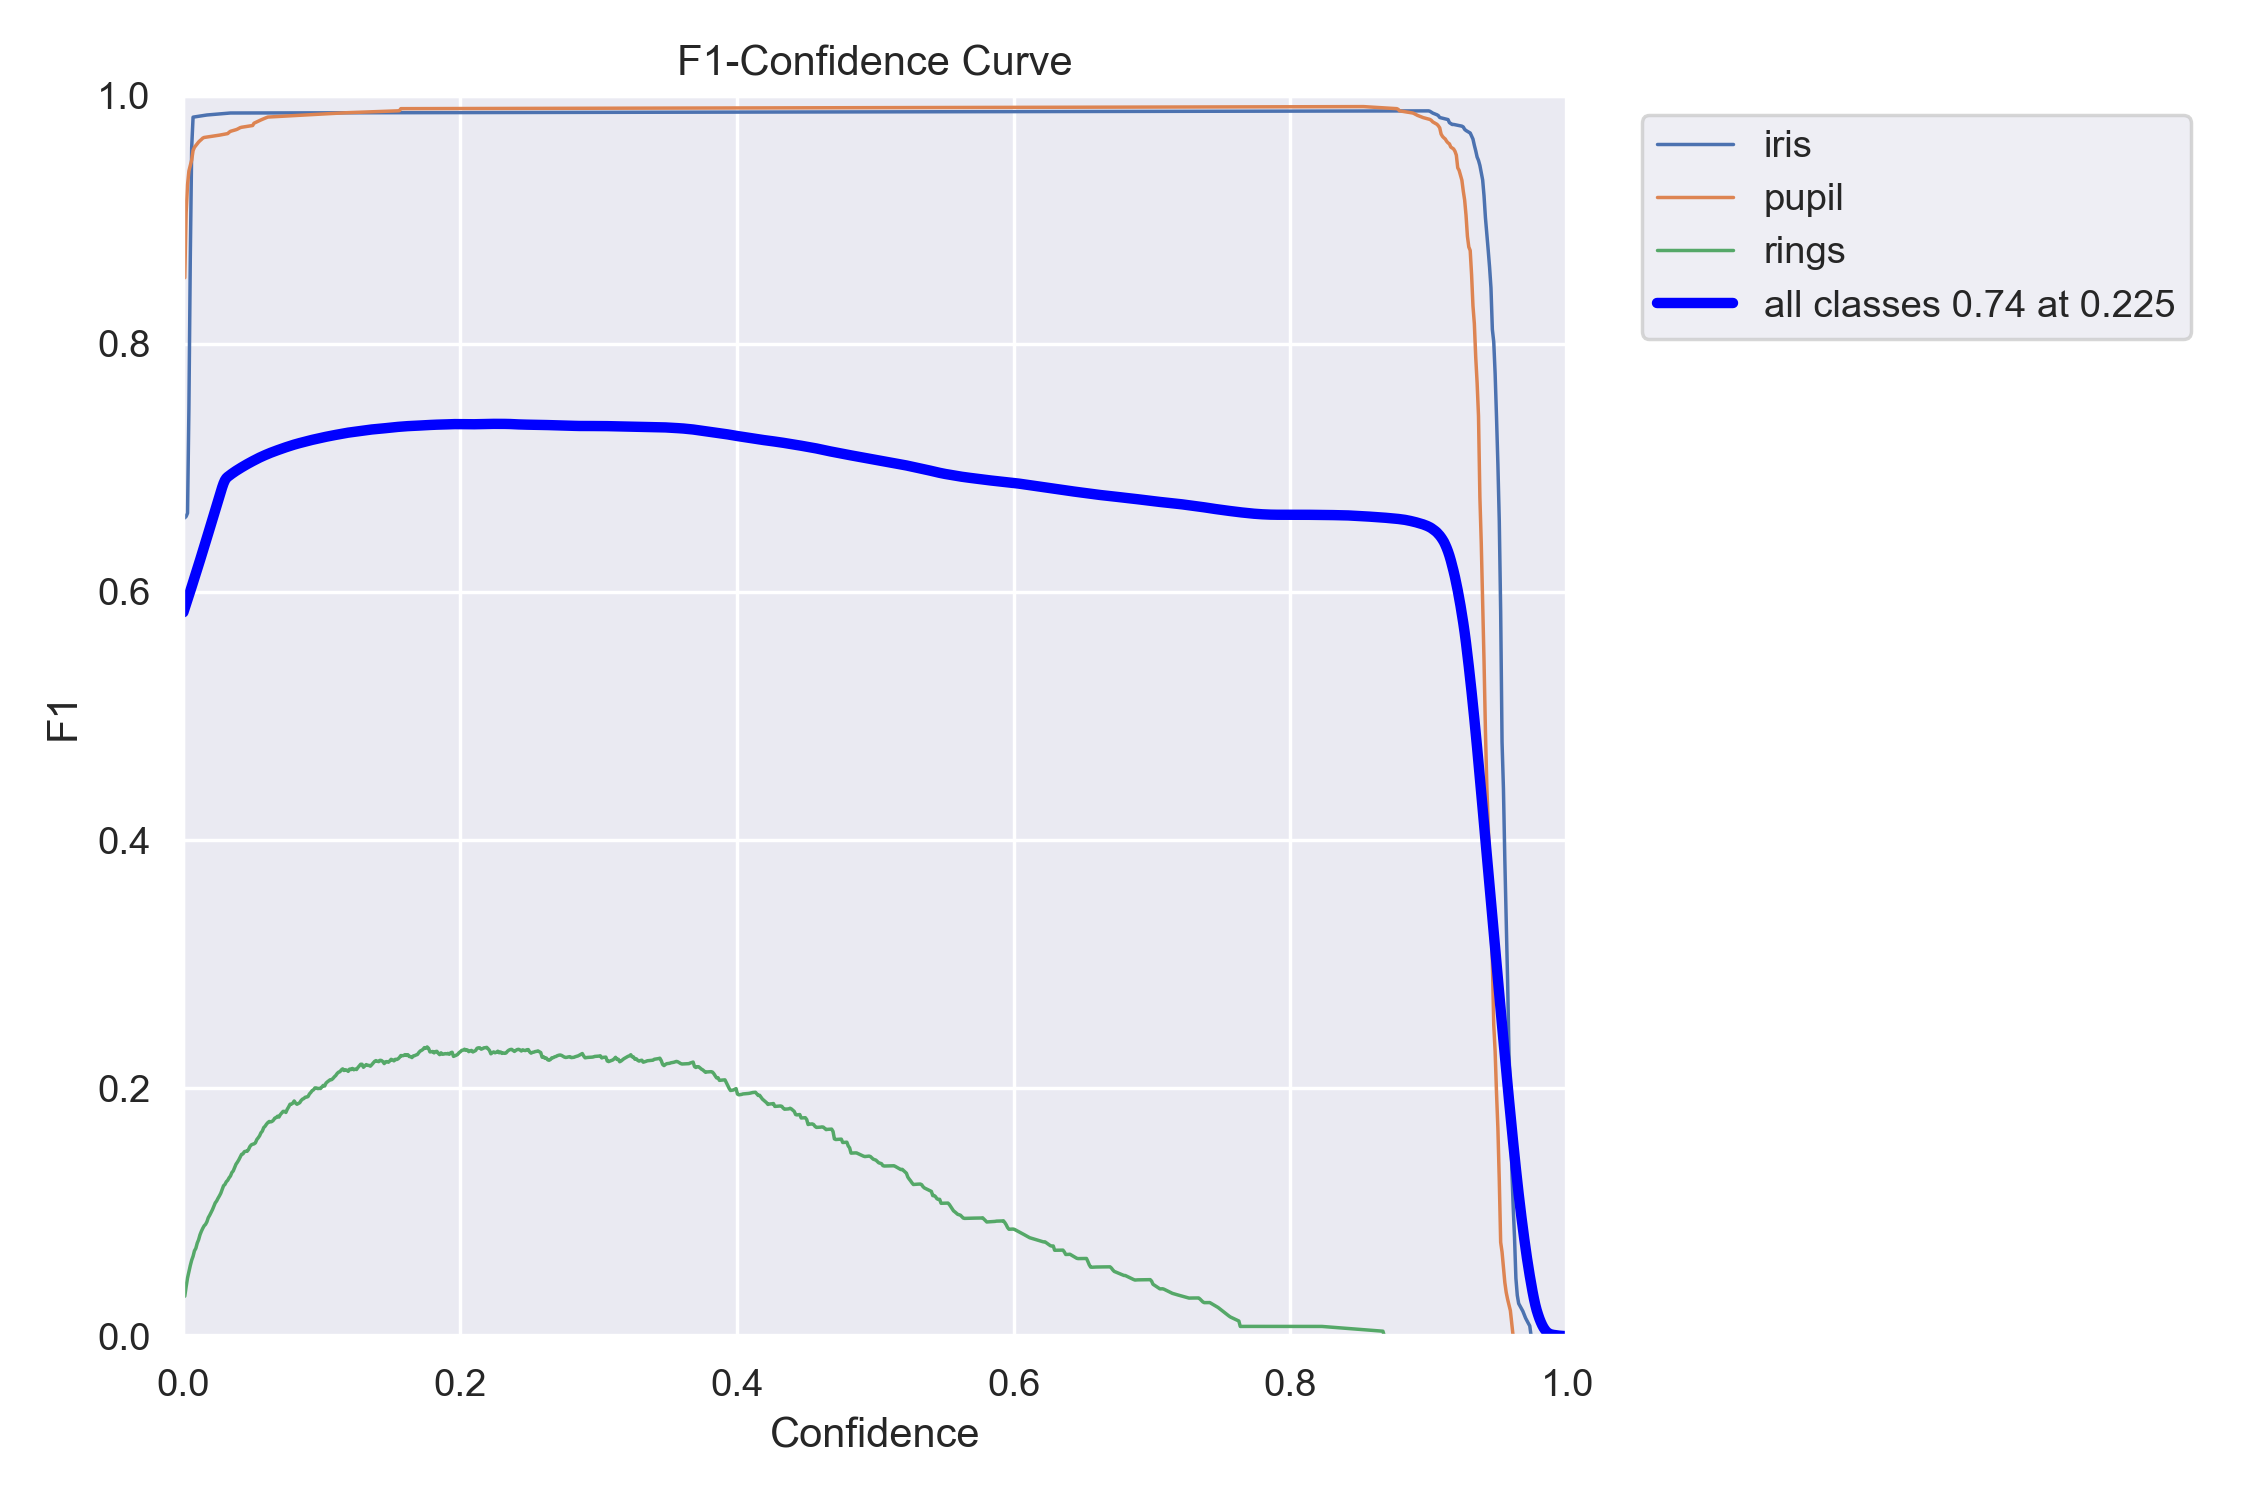

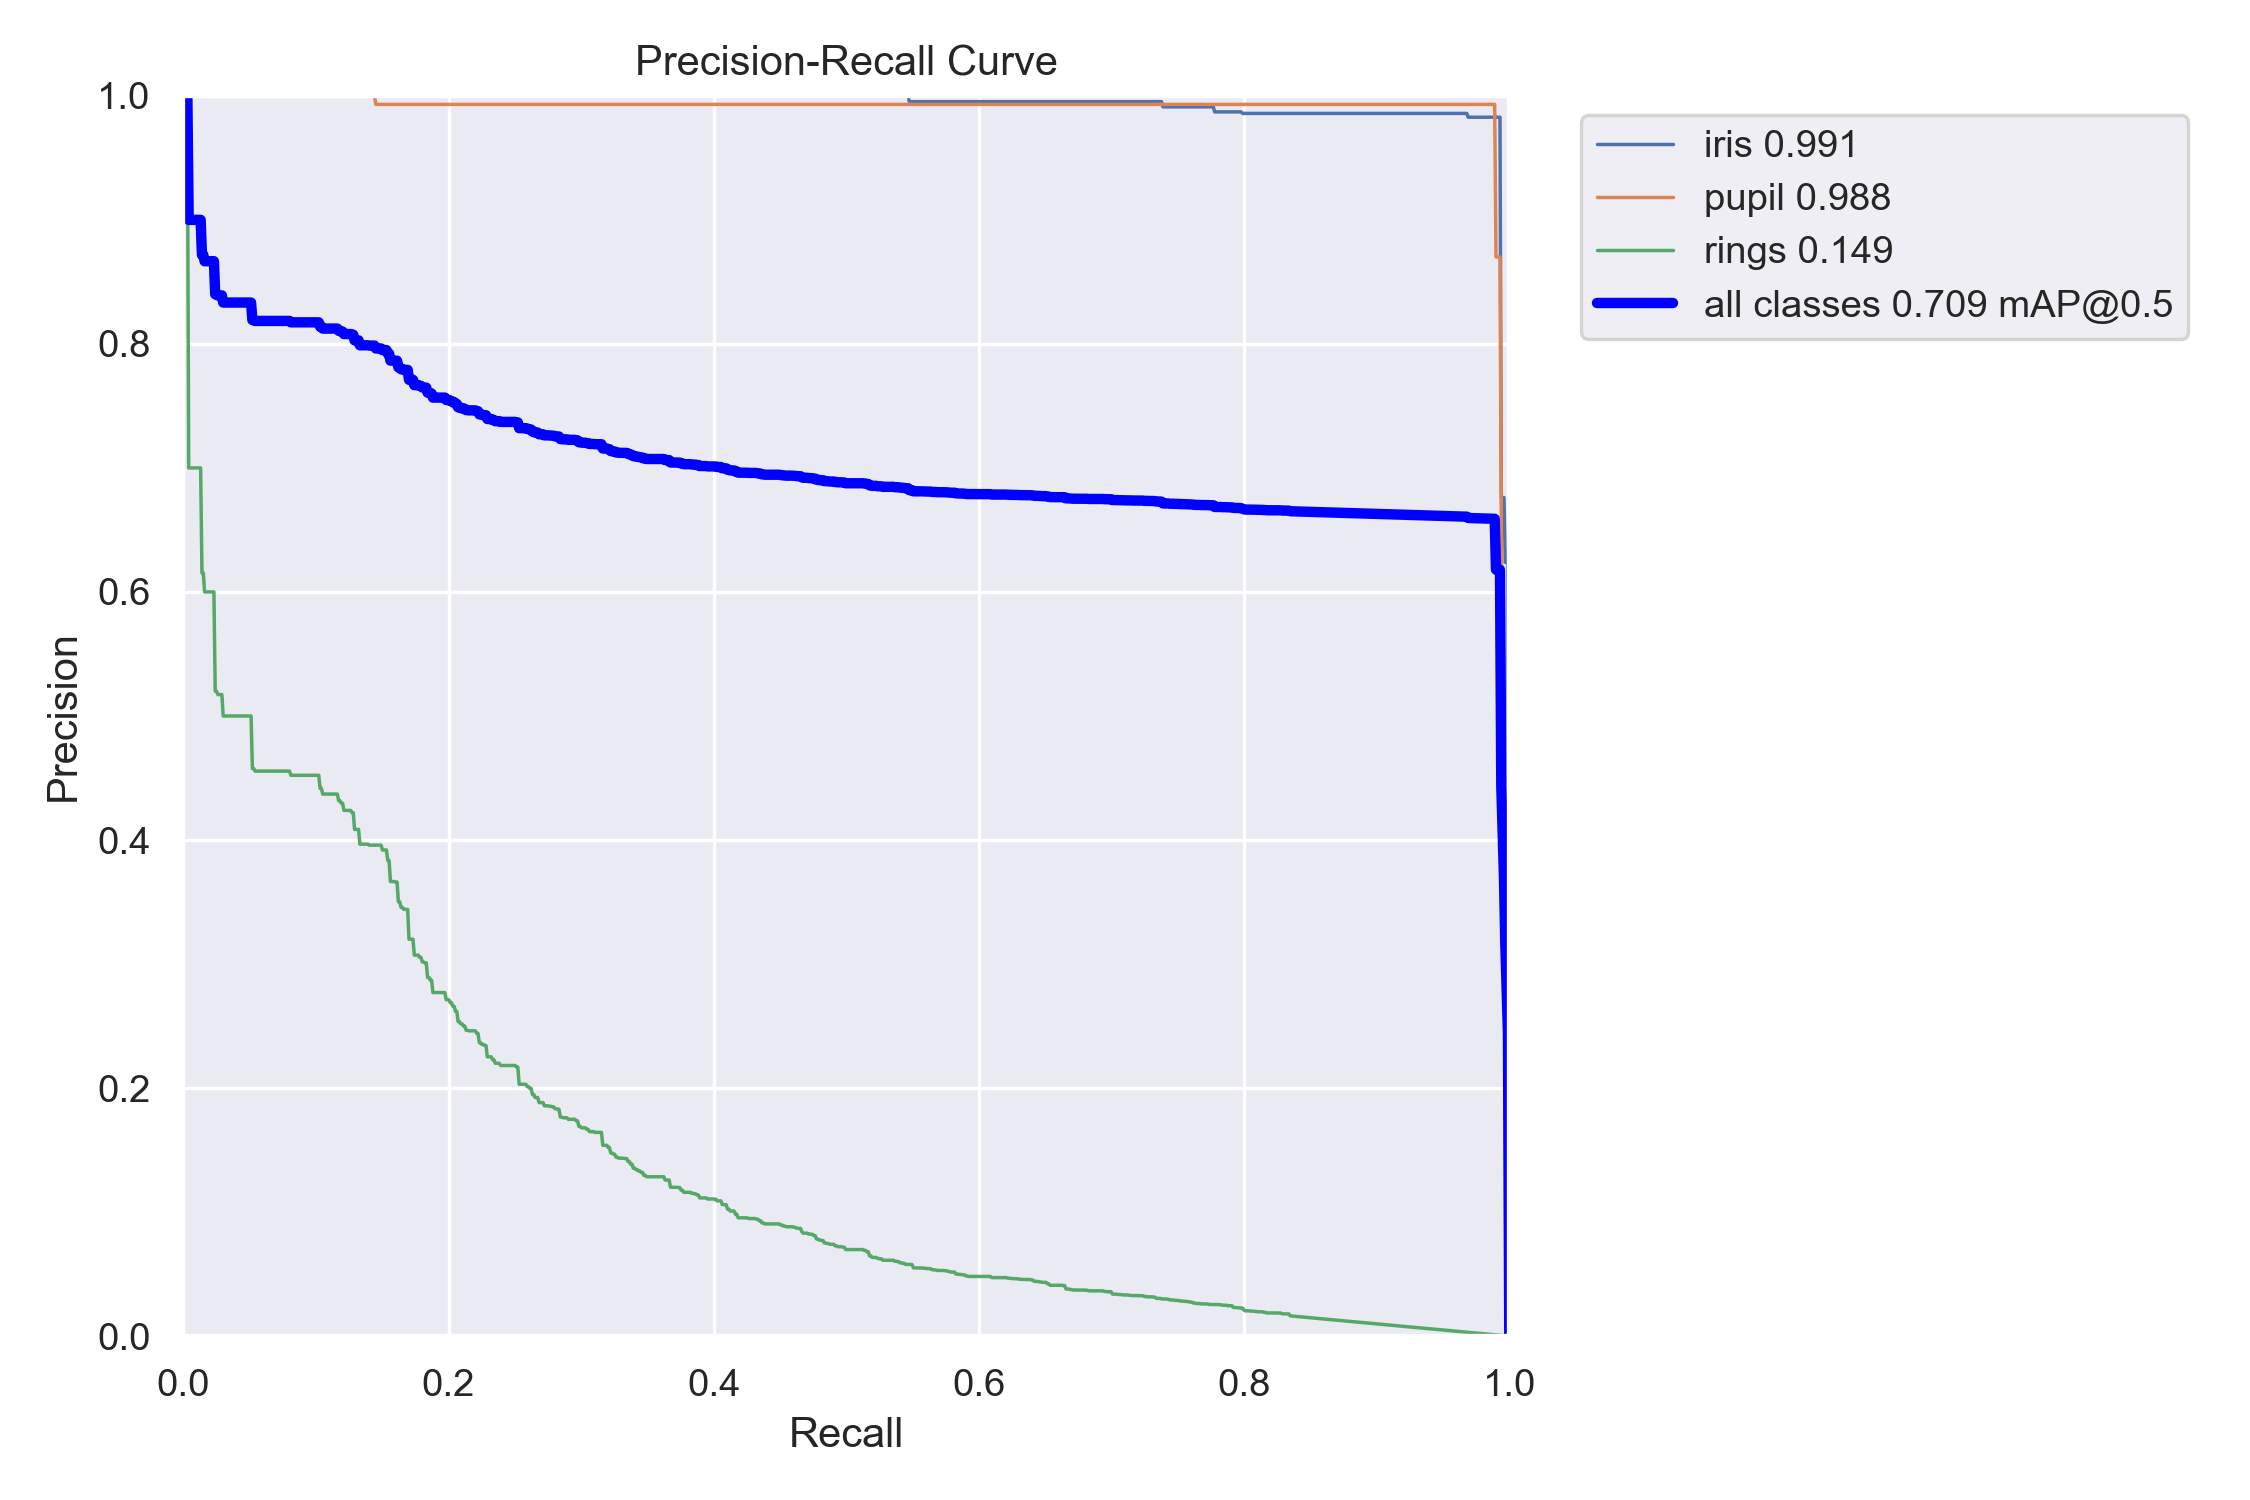

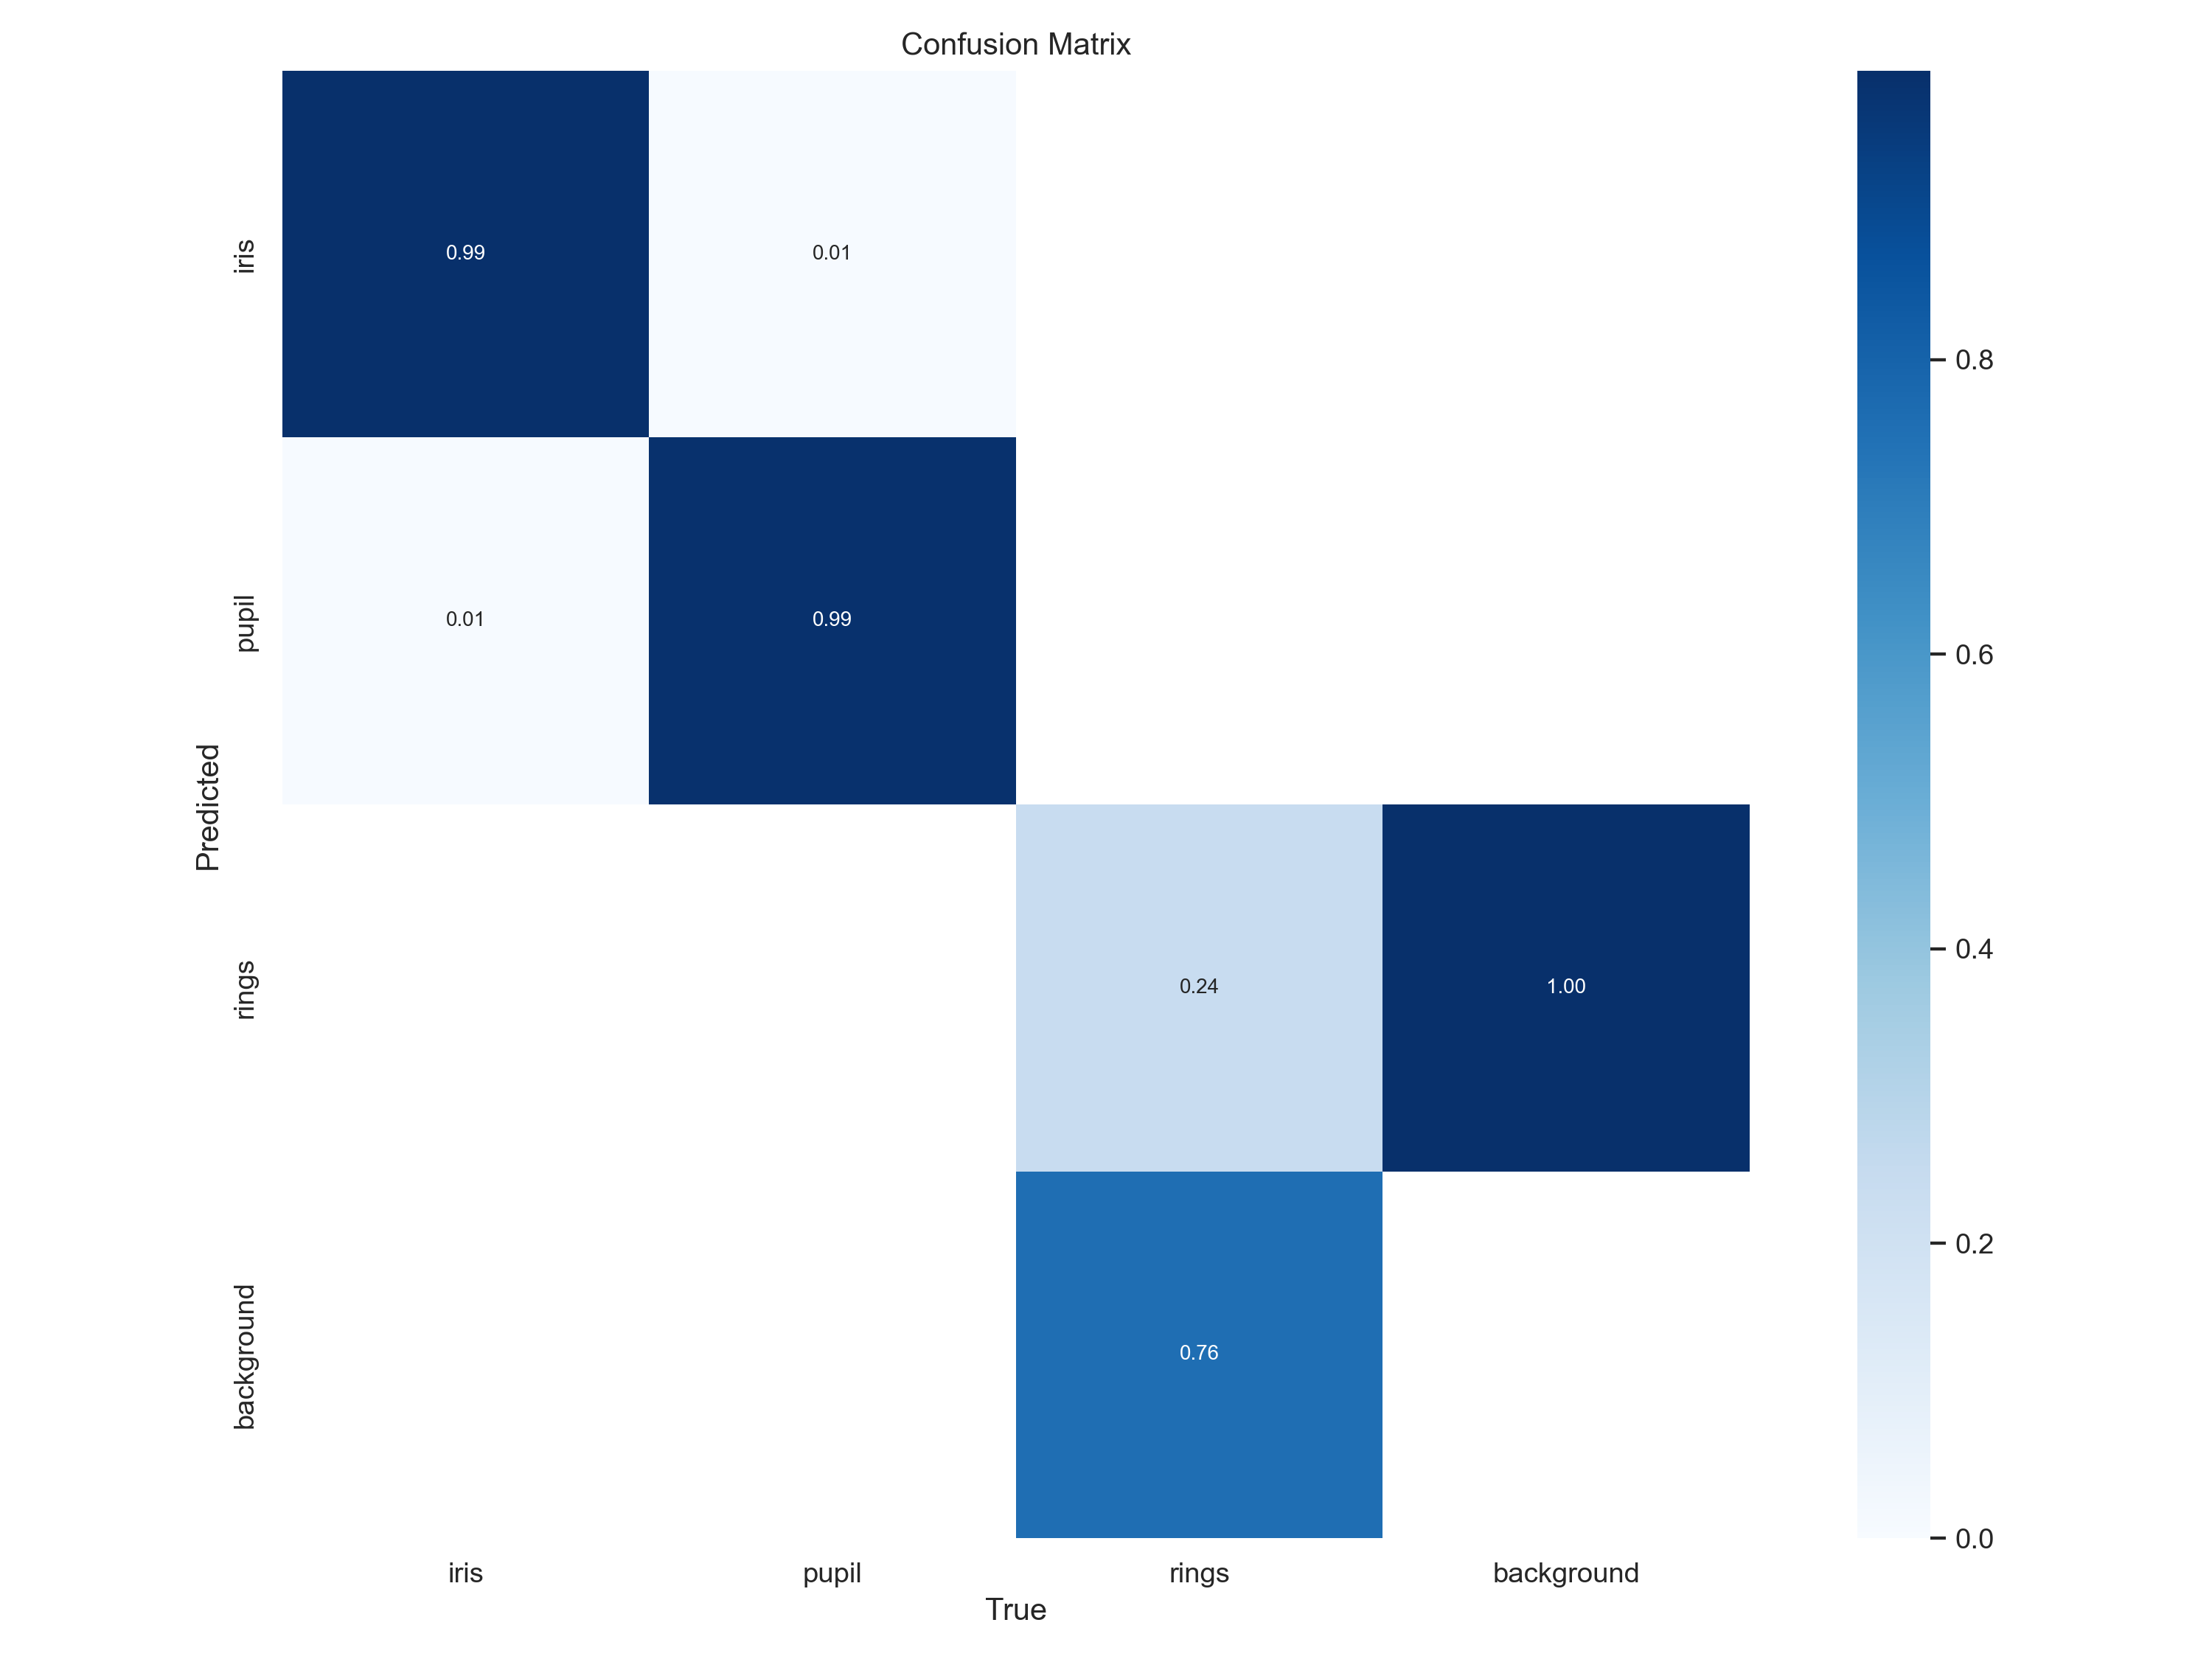

In [7]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/detect/train14/F1_curve.png') 
y = Image(filename='runs/detect/train14/PR_curve.png') 
z = Image(filename='runs/detect/train14/confusion_matrix.png') 
display(x, y,z)

### **Inference:**


In [12]:
# checking the latest trained files
!ls 'runs/detect/train14/weights'

best.pt
last.pt


In [9]:
# loading the trianed model
model = YOLO("runs/detect/train14/weights/best.pt")  # load a custom model

In [10]:
# testing the model on a video

# results = model("/content/drive/MyDrive/datasets/mask_dataset/mask_testing.mp4") 

# -- OR --

!yolo task=detect mode=predict model=runs/detect/train14/weights/best.pt source=inference_data/eye.mp4 show=True imgsz=1280 name=yolov9 hide_labels=False

Ultralytics YOLOv8.0.53  Python-3.10.9 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/249) E:\ONEDRIVE\OneDrive - oasis.inje.ac.kr\MY_projects\Yolov8-Custom-Object-Detetction\inference_data\eye.mp4: 736x1280 (no detections), 53.0ms
video 1/1 (2/249) E:\ONEDRIVE\OneDrive - oasis.inje.ac.kr\MY_projects\Yolov8-Custom-Object-Detetction\inference_data\eye.mp4: 736x1280 (no detections), 28.8ms
video 1/1 (3/249) E:\ONEDRIVE\OneDrive - oasis.inje.ac.kr\MY_projects\Yolov8-Custom-Object-Detetction\inference_data\eye.mp4: 736x1280 (no detections), 21.3ms
video 1/1 (4/249) E:\ONEDRIVE\OneDrive - oasis.inje.ac.kr\MY_projects\Yolov8-Custom-Object-Detetction\inference_data\eye.mp4: 736x1280 (no detections), 24.0ms
video 1/1 (5/249) E:\ONEDRIVE\OneDrive - oasis.inje.ac.kr\MY_projects\Yolov8-Custom-Object-Detetction\inference_data\eye.mp4: 736x1280 (no detections), 24.0ms
video 1/1 (6/249) E:\ONEDRIV

In [32]:
# testing the model on images

# results = model("inference_data/eye.mp4") 

!yolo task=detect mode=predict model=runs/detect/train14/weights/best.pt source=inference_data/eye4.jpeg show=True imgsz=1280 name=yolov14 hide_labels=False

Ultralytics YOLOv8.0.53  Python-3.10.9 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 E:\ONEDRIVE\OneDrive - oasis.inje.ac.kr\MY_projects\Yolov8-Custom-Object-Detetction\inference_data\eye4.jpeg: 704x1280 1 iris, 1 pupil, 77.0ms
Speed: 5.0ms preprocess, 77.0ms inference, 7.0ms postprocess per image at shape (1, 3, 1280, 1280)


### **Conclusion:**
Based on the inference results, the trained model is doing a great job. We can still imrpove it by using large yolov8 models, additional data and hyperparameter changes. 

### **References:**

1.https://github.com/ultralytics/ultralytics

2.https://docs.ultralytics.com/tasks/detection/

3.https://www.kaggle.com/datasets/maalialharbi/face-mask-dataset?resource=download